## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/home/aakant/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/aakant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


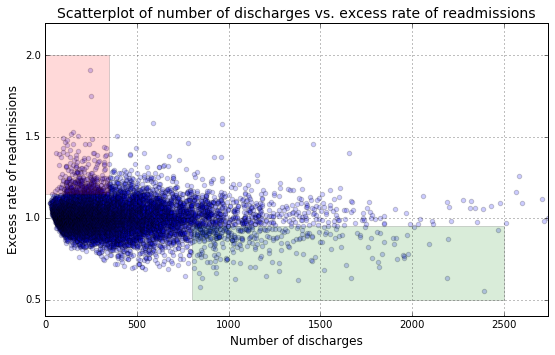

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
#If not independent:
#For groups of <100 vs >=100, <200 vs >= 200, ... and so on, test the hypothesis that there is a 
#significant difference between the two groups

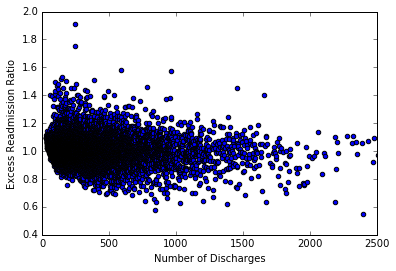

In [6]:
trimmeddf = clean_hospital_read_df[["Number of Discharges", "Excess Readmission Ratio"]]
trimmeddf = trimmeddf[~trimmeddf["Excess Readmission Ratio"].isnull()]
trimmeddf.plot(kind='scatter',x=0,y=1,xlim=(0,2500))
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

Clearly, the scatterplot shows an inverse relation between number of discharges and excess readmission ratio. However, the effect size remains to be seen. I agree with the initial observations and the statistics reported, as the calculations are done below. However, I disagree with the recommendations as explained below.

/home/aakant/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


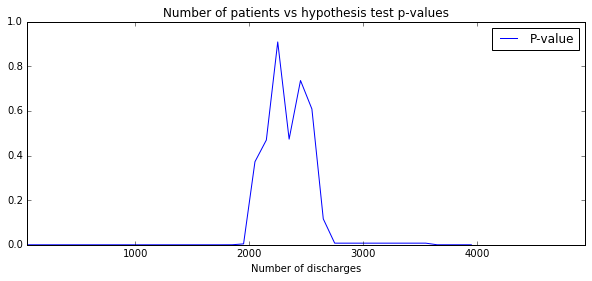

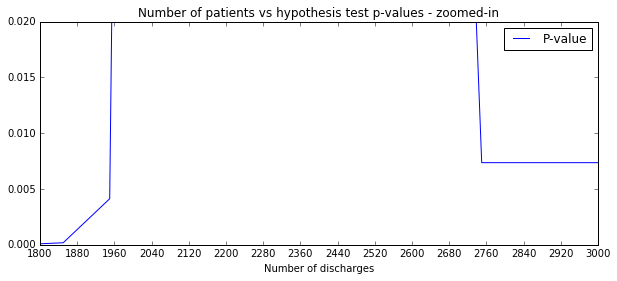

In [7]:
start=50
count = 0
intervals = list()
while count < 50:
    intervals.extend([start+100*count])
    count+=1

listingDict = dict()

for i in intervals:
    group1 = trimmeddf[trimmeddf.iloc[:,0] < i].iloc[:,1]
    group2 = trimmeddf[trimmeddf.iloc[:,0] >= i].iloc[:,1]
    theIndTest = stats.ttest_ind(group1, group2) 
    
    newDict = dict()    
    newDict["Statistic"] = theIndTest.statistic
    newDict["P-value"] = theIndTest.pvalue
    newDict["Group 1 mean"] = group1.mean()
    newDict["Group 2 mean"] = group2.mean()
    newDict["Group 1 percent under 1"] = len(group1[group1 <= 1])/len(group1)
    newDict["Group 1 percent more than 1"] = len(group1[group1 > 1])/len(group1)
    newDict["Group 2 percent under 1"] = len(group2[group2 <= 1])/len(group2)
    newDict["Group 2 percent more than 1"] = len(group2[group2 > 1])/len(group2)
    
    listingDict[i] = newDict
    
testDf = pd.DataFrame.from_dict(listingDict, orient="index")
cols = ["P-value", "Group 1 mean", "Group 2 mean", "Group 1 percent under 1", "Group 2 percent under 1", "Group 1 percent more than 1", "Group 2 percent more than 1", "Statistic"]
testDf = testDf[cols] 

outplot = testDf.iloc[:,[0]].plot(title="Number of patients vs hypothesis test p-values", ylim=(0,1)).legend(bbox_to_anchor=(1,1)).get_figure()
outplot.gca().set_xlabel("Number of discharges")
outplot.set_figwidth(10)

outplot2 = testDf.iloc[:,[0]].plot(title="Number of patients vs hypothesis test p-values - zoomed-in", ylim=(0,0.02), xlim=(1800,3000), xticks=(np.arange(start=1800,stop=3001, step=80))).legend(bbox_to_anchor=(1,1)).get_figure()
outplot2.gca().set_xlabel("Number of discharges")
outplot2.set_figwidth(10)
#outplot.legend(bbox_to_anchor=(1.7,1)).get_figure()

The claim that a lower number of discharges correlates with a high re-admission rate is true only if the number of charges is lower than 1900 or more than 2760. For the hospitals within the range of 1900 to 2700 discharges, there is no statistical correlation between the number of charges and re-admission rates.

My recommendations would be as follows:
1. Visit those hospitals and clinics with discharge rates of less than 1900 and look for factors that may increase the chances of higher readmission rates. Is it really the medical practice at these hospitals? Or are there other variables that exist in these locations that are the cause of re-admission rates. It is clear that there is a correlation between discharge rates and re-admission rates in these specific hospitals, but correlation does not imply causation.
2. Also, a more detailed analysis is needed on those patients that are discharged from higher discharge hospitals. Why are there lower readmission rates? Is it really because the quality of services at these hospitals as very good? Or are there other environmental factors that are causing the lower re-admit rates?